<img width="600px" src="https://www.urp.edu.pe/img/thumbnails/wm/745/hm/243/we/745/he/243/x/0/y/0/s/0/q/60/zc/3/f/0/rgb/000000/src/28042/n/picture3.png"></img>
# <font color='Darkorange'>Unidad de Posgrado - Maestría en Ciencia de los datos</font></span>
## <font color='Steelblue'> Fundamentos computacionales e Introducción a ciencia de datos - Prof: Dr. Oscar Ramos Ponce </font></span>
## Alumno: **Leandra Jaramillo**
## Código: **202421025**
---
----

## **Evaluación Parcial**

## **Indicaciones**

* Para cada pregunta adjuntar la parte principal del código utilizado (como captura de pantalla), e indicar claramente la respuesta a lo solicitado. Si no queda claro qué pregunta se está respondiendo o cuál es la respuesta, no se tendrá el puntaje completo.
* Se puede utilizar Python y/o R para el desarrollo
* Se puede utilizar todo el material de apoyo que se considere necesario
* Se debe subir un archivo convertido a formato PDF
* Tiempo: 2 horas y 30 minutos

### **Importación  de las librerias y herramientas para desarrollar el trabajo:**

In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos y valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Limpieza y preprocesamiento (opcional)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Control de advertencias
import warnings
warnings.filterwarnings('ignore')

## **Pregunta 1 (7 puntos)**

Considerar el conjunto de datos chatarreo.csv. Utilizando Python o R dar respuesta a las siguientes preguntas. 
a) [2 puntos] 

# a) Determinar:
* Cuál es el tipo de vehículo, y su respectiva marca, que tiene la menor cantidad de asientos y la mayor cantidad de asientos. 
* Estos vehículos son ¿gasolineros o petroleros?
* La antigüedad de estos vehículos ¿es mayor o menor a la antigüedad promedio de todos los vehículos?

### **Carga, descripción y exploración inicial del dataset:**  

In [2]:
import os

# Obtener la ruta del directorio de trabajo actual
ruta_actual = os.getcwd()
print(ruta_actual)

C:\Users\Leandra\1. Maestría\1.3 Fundamentos


In [3]:
# Carga del dataset
archivo = 'chatarreo.csv'
try:
    df = pd.read_csv(archivo, encoding='utf-8', delimiter=';')
except UnicodeDecodeError:
    df = pd.read_csv(archivo, encoding='ISO-8859-1', delimiter=';')

In [4]:
# visualizar las primeras filas del dataset para verficar la carga correcta
df.head()

,Marca,Antigüedad,Tipo,N_asientos,T_combustible
0,Mercedes Benz,15,buses,32,gasolina
1,Mercedes Benz,25,microbuses,28,petroleo
2,Dodge,18,microbuses,25,gasolina
3,Scania,17,combi,15,gasolina
4,Mercedes Benz,25,buses,32,petroleo


# Respuestas de a)

**¿Cuál es el tipo de vehículo, y su respectiva marca, que tiene la menor cantidad de asientos y la mayor cantidad de asientos?**

In [5]:
# Calcular el máximo y el mínimo de la variable N_asientos y su respectiva Marca
max_asientos = df.loc[df['N_asientos'].idxmax()]
min_asientos = df.loc[df['N_asientos'].idxmin()]

# Imprimir los resultados
print("Máximo número de asientos:")
print(max_asientos[['Marca', 'N_asientos']])

print("\nMínimo número de asientos:")
print(min_asientos[['Marca', 'N_asientos']])

Máximo número de asientos:
Marca         Scania
N_asientos        46
Name: 29, dtype: object

Mínimo número de asientos:
Marca         Mercedes Benz
N_asientos               12
Name: 94, dtype: object


**¿Estos vehículos son ¿gasolineros o petroleros?**

In [6]:
# Calcular el máximo y el mínimo de la variable N_asientos y su respectiva Marca
max_asientos = df.loc[df['N_asientos'].idxmax()]
min_asientos = df.loc[df['N_asientos'].idxmin()]

# Imprimir los resultados
print("Numero gasolineros:")
print(max_asientos[['Marca', 'T_combustible']])

print("Numero petroleros:")
print(min_asientos[['Marca', 'T_combustible']])

Numero gasolineros:
Marca              Scania
T_combustible    gasolina
Name: 29, dtype: object
Numero petroleros:
Marca            Mercedes Benz
T_combustible         gasolina
Name: 94, dtype: object


**¿La antigüedad de estos vehículos ¿es mayor o menor a la antigüedad promedio de todos los vehículos?**

In [7]:
# Calcular la antigüedad promedio de todos los vehículos
antiguedad_promedio = df['Antigüedad'].mean()

# Crear una nueva columna para indicar si la antigüedad de cada vehículo es mayor o menor a la antigüedad promedio
df['Comparacion_Antigüedad'] = df['Antigüedad'].apply(lambda x: 'Mayor' if x > antiguedad_promedio else 'Menor')

# Imprimir los resultados con la marca, antigüedad y comparación
print(df[['Marca', 'Antigüedad', 'Comparacion_Antigüedad']])

             Marca  Antigüedad Comparacion_Antigüedad
0    Mercedes Benz          15                  Menor
1    Mercedes Benz          25                  Mayor
2            Dodge          18                  Menor
3           Scania          17                  Menor
4    Mercedes Benz          25                  Mayor
..             ...         ...                    ...
195          Dodge          22                  Mayor
196         Scania          14                  Menor
197  Mercedes Benz          30                  Mayor
198         Scania          18                  Menor
199  Mercedes Benz          13                  Menor

[200 rows x 3 columns]


## b) [2 puntos] Estimar:
* La antigüedad promedio, máxima y mínima de cada una de las marcas de vehículos de la tabla (se puede mostrar el resultado como una tabla). 
* Realizar un diagrama de barras donde se muestre la antigüedad promedio de cada marca.

# Respuestas de b)

* **La antigüedad promedio, máxima y mínima de cada una de las marcas de vehículos de la tabla (se puede mostrar el resultado como una tabla)**

In [8]:
# Calcular la antigüedad promedio, máxima y mínima por marca
antiguedad_por_marca = df.groupby('Marca')['Antigüedad'].agg(['mean', 'max', 'min']).reset_index()

# Renombrar las columnas para mayor claridad
antiguedad_por_marca.columns = ['Marca', 'Antigüedad Promedio', 'Antigüedad Máxima', 'Antigüedad Mínima']

# Mostrar la tabla de resultados
print(antiguedad_por_marca)

           Marca  Antigüedad Promedio  Antigüedad Máxima  Antigüedad Mínima
0          Dodge            20.513889                 30                 12
1  Mercedes Benz            21.772727                 30                 12
2         Scania            22.403226                 30                 12


* **Realizar un diagrama de barras donde se muestre la antigüedad promedio de cada marca**

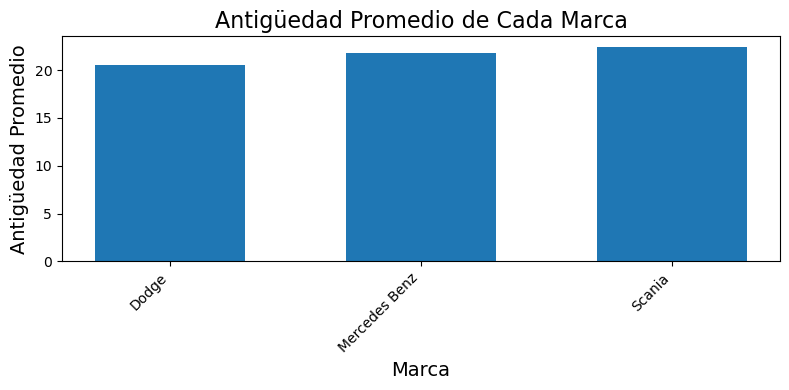

In [9]:
# Calcular la antigüedad promedio por marca
antiguedad_promedio_marca = df.groupby('Marca')['Antigüedad'].mean().reset_index()

# Crear el diagrama de barras
plt.figure(figsize=(8, 4))
plt.bar(antiguedad_promedio_marca['Marca'], antiguedad_promedio_marca['Antigüedad'], width=0.6)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Antigüedad Promedio', fontsize=14)
plt.title('Antigüedad Promedio de Cada Marca', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## c) [3 puntos] Desarrollar lo siguiente:

* Realizar un diagrama de barras que muestre en total cuántos vehículos petroleros y gasolineros existen. 
* Realizar diagramas de barras que muestren la cantidad de vehículos de cada marca separando los vehículos petroleros de los gasolineros
* Realizar gráficos circulares que muestren la cantidad de vehículos de cada tipo, separando los vehículos petroleros de los gasolineros
* Concluir si las marcas y tipos pareciesen tener relación con el tipo de combustible (gasolinero/petrolero) a partir de las figuras realizadas.

# Respuestas de c)

* **Realizar un diagrama de barras que muestre en total cuántos vehículos petroleros y gasolineros existen.**

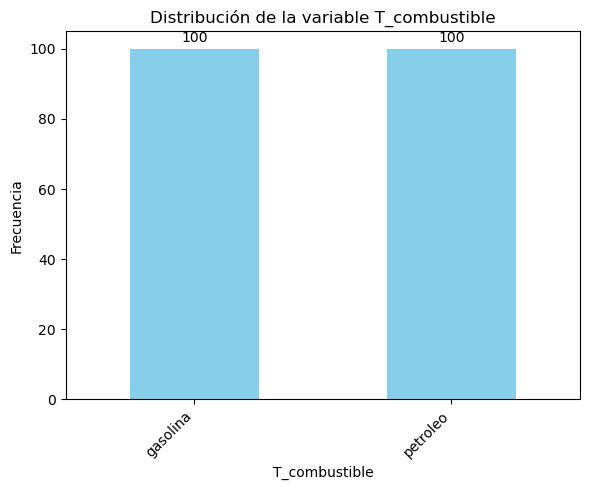

In [10]:
# Visualización del total de vehiculos petroleros y gasolineros 

# Contar el total de vehículos por tipo de combustible
tipo_combustible_counts = df['T_combustible'].value_counts()

# Crear un gráfico de barras para la distribución por tipo de combustible
plt.figure(figsize=(6, 5))
bars = tipo_combustible_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable T_combustible')
plt.xlabel('T_combustible')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas sobre cada barra con el total graficado
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), ',d'), 
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  xytext=(0, 3),  # Desplazamiento de las etiquetas en píxeles
                  textcoords="offset points", 
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

* **Realizar diagramas de barras que muestren la cantidad de vehículos de cada marca separando los vehículos petroleros de los gasolineros**

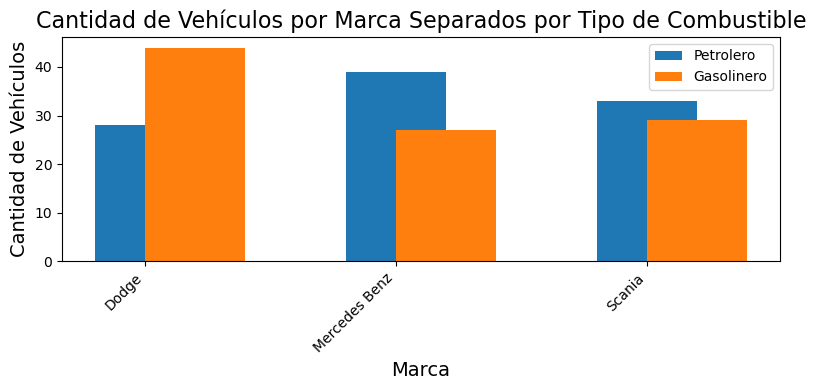

In [11]:
# Filtrar los datos por tipo de combustible
df_petrolero = df[df['T_combustible'] == 'petroleo']
df_gasolineros = df[df['T_combustible'] == 'gasolina']

# Calcular la cantidad de vehículos por marca para cada tipo de combustible
cantidad_petrolero = df_petrolero['Marca'].value_counts().sort_index()
cantidad_gasolineros = df_gasolineros['Marca'].value_counts().sort_index()

# Crear el diagrama de barras
plt.figure(figsize=(8, 4))
plt.bar(cantidad_petrolero.index, cantidad_petrolero, width=0.4, label='Petrolero', align='center')
plt.bar(cantidad_gasolineros.index, cantidad_gasolineros, width=0.4, label='Gasolinero', align='edge')

plt.xlabel('Marca', fontsize=14)
plt.ylabel('Cantidad de Vehículos', fontsize=14)
plt.title('Cantidad de Vehículos por Marca Separados por Tipo de Combustible', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* **Realizar gráficos circulares que muestren la cantidad de vehículos de cada tipo, separando los vehículos petroleros de los gasolineros**

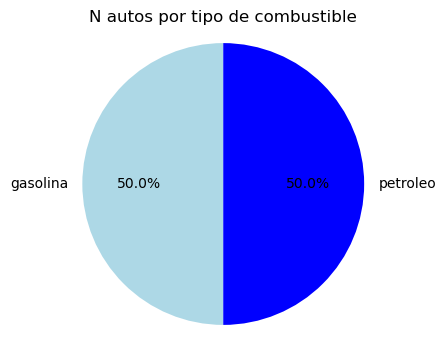

In [12]:
# Visualización de la cantidad de vehiculos por tipo de caombustible 

# Contar la frecuencia de cada valor mapeado
combustible_counts = df['T_combustible'].value_counts()

# Graficar el Pie chart
plt.figure(figsize=(4, 4))
plt.pie(combustible_counts, labels=combustible_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'blue'])

# Personalización
plt.title('N autos por tipo de combustible')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

* **Concluir si las marcas y tipos pareciesen tener relación con el tipo de combustible (gasolinero/petrolero) a partir de las figuras realizadas**

**Respuesta:**

* La Marca Dodge es la que muestra la tendencia más marcada a tener mayor cantidad de número de carros de tipo Gasolinero. 
* La Marca Mercedez benz muestra una mayor tendencia a tener carros de tipo petrolero
* La Marca Scania aunque tiene mayor numero de carros de tipo petrolero muy de cerca se encuentra el número de carros de su marca de tipo gaolinero. 

## **Pregunta 2 (6 puntos)**

El conjunto de datos credit.csv contiene datos de 1000 créditos otorgados por un banco alemán. Para cada cliente al que se le otorgó un crédito se registró lo siguiente: 

* **Y**: Estado crediticio del cliente (bueno/malo)
* **Cuenta**: Calidad de cuenta bancaria del cliente (no:sin cuenta bancaria, good, bad)
* **Mes**: Duración del préstamo (en meses)
* **Ppag**: Comportamiento crediticio previo (buen pagador, mal Pagador)
* **Uso**: Intención de uso (privado, profesional)
* **DM**: Monto del préstamo (en marcos alemanes)
* **Sexo**: Género del cliente (mujer, hombre)
* **Estc**: Estado civil del cliente (no vive solo, vive solo)

a) [2 puntos]  Describir la distribución de la duración del préstamo en meses

* Realizar un histograma que muestre la distribución
* Ajustar una distribución al conjunto de datos
* Indicar la media, mediana y si se trata de una distribución normal o asimétrica usando algunas métricas

In [13]:
# Cargar el archivo CSV 
df_2 = pd.read_csv("credit.csv")

# visualizar las dimensiones del dataset
df_2.shape

(1000, 8)

In [14]:
# visaulizando las primeras filas del dataframe
df_2.head()

,Y,Cuenta,Mes,Ppag,Uso,DM,Sexo,Estc
0,buen,no,18,pre buen pagador,privado,1049,mujer,vive solo
1,buen,no,9,pre buen pagador,profesional,2799,hombre,no vive solo
2,buen,bad running,12,pre buen pagador,profesional,841,mujer,vive solo
3,buen,no,12,pre buen pagador,profesional,2122,hombre,no vive solo
4,buen,no,12,pre buen pagador,profesional,2171,hombre,no vive solo


In [15]:
# identificando y clasificando las columnas del dataset

# Identificar variables Numéricas:
columnas_numericas = df_2.select_dtypes(include=['number']).columns.tolist()

#Identificar variables Categóricas: 
columnas_categoricas = df_2.select_dtypes(include=['object']).columns.tolist()

print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)

Columnas numéricas: ['Mes', 'DM']
Columnas categóricas: ['Y', 'Cuenta', 'Ppag', 'Uso', 'Sexo', 'Estc']


* **Describir la distribución de la duración del préstamo en meses**

**Entre 10 y 20 meses se concentran la mayoria de los plazos otorgados para los créditos**

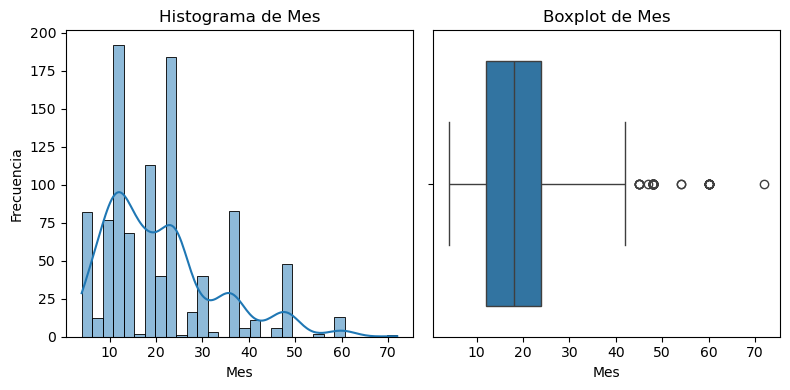

In [16]:
# Visualización de la distribución de la duración del préstamo en meses
variables_numericas = ['Mes']

# Generar un histograma y un boxplot por cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 4))
    
    # Histograma
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
    sns.histplot(df_2[variable], kde=True, bins=30)
    plt.title(f'Histograma de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    
    # Boxplot
    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
    sns.boxplot(x=df_2[variable])
    plt.title(f'Boxplot de {variable}')
    plt.xlabel(variable)
    
    # Mostrar ambos gráficos en la misma figura
    plt.tight_layout()
    plt.show()

**Interpretación del Histograma de Meses de plazos del crédito**

* Distribución Multimodal a la derecha: El histograma muestra que los plazos se concentran principalmente varios picos marcados en la derecha entre 5, 10, 15, 20, 25, meses de plazo siendo el mínimos 4 meses de plazo y el máximo 72 meses. Esto indica que los plazos no tienen uns distribución simétrica y que existen factores que hacen las condicones de estos varien. 

**Pregunta:Indicar la media, mediana y si se trata de una distribución normal o asimétrica usando algunas métricas**

In [17]:
import scipy.stats as stats

# Calcular la media y mediana de la variable 'Mes'
media_mes = df_2['Mes'].mean()
mediana_mes = df_2['Mes'].median()

# Calcular la asimetría (skewness) y la curtosis (kurtosis) para evaluar la distribución
asimetria_mes = df_2['Mes'].skew()
curtosis_mes = df_2['Mes'].kurtosis()

# Determinar si la distribución es normal o asimétrica usando la asimetría y la comparación de media y mediana
if abs(asimetria_mes) < 0.5:
    distribucion = 'Normal'
else:
    distribucion = 'Asimétrica'

# Imprimir los resultados
print(f"Media de 'Mes': {media_mes}")
print(f"Mediana de 'Mes': {mediana_mes}")
print(f"Asimetría de 'Mes': {asimetria_mes}")
print(f"Curtosis de 'Mes': {curtosis_mes}")
print(f"La distribución es: {distribucion}")

Media de 'Mes': 20.903
Mediana de 'Mes': 18.0
Asimetría de 'Mes': 1.0941841715555418
Curtosis de 'Mes': 0.9197813600546372
La distribución es: Asimétrica


## b) [2 puntos] 

A través de una exploración visual y cuantitativa indicar si se puede sospechar que existe alguna asociación entre el monto del préstamo y la intención de uso del mismo (si es privado o profesional)

In [18]:
from scipy.stats import pointbiserialr
import seaborn as sns

# Variable cualitativa dicotómica (Estado del Préstamo: 1 = Aprobado, 0 = Rechazado)
df_2['Uso'] = df_2['Uso'].map({'privado': 1, 'profesional': 0})

# Variable cuantitativa continua (Ingreso)
ingreso = df_2['DM']

# Aplicar el coeficiente de correlación biserial (usamos pointbiserialr ya que este método lo calcula)
coef_biserial, p_value = pointbiserialr(df_2['Uso'], ingreso)

# Mostrar el resultado
print(f'Coeficiente de Correlación Biserial: {coef_biserial}')
print(f'P-valor: {p_value}')

# Interpretación del p-valor
if p_value < 0.05:
    print("Hay una asociación entre el monto del prestamo y el uso.")
else:
    print("No hay una asociación entr el monto del préstamo y el uso.")

Coeficiente de Correlación Biserial: -0.07207669069537835
P-valor: 0.02264451676272818
Hay una asociación entre el monto del prestamo y el uso.


<Figure size 800x600 with 0 Axes>

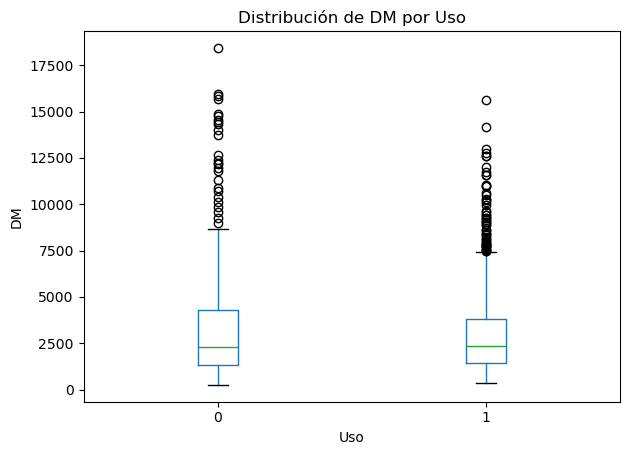

In [21]:
import matplotlib.pyplot as plt

# Crear el diagrama de cajas para la variable 'DM' según la categoría de 'uso'
plt.figure(figsize=(8, 6))
df_2.boxplot(column='DM', by='Uso', grid=False)

# Personalizar el gráfico
plt.title('Distribución de DM por Uso')
plt.suptitle('')  # Eliminar el título superpuesto
plt.xlabel('Uso')
plt.ylabel('DM')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## **c)** [2 puntos] 

Indicar alguna variable que parezca tener impacto sobre el estado crediticio del cliente. Justificar utilizando algunas métricas cuantitativas y con alguna figura

**Respuesta:**

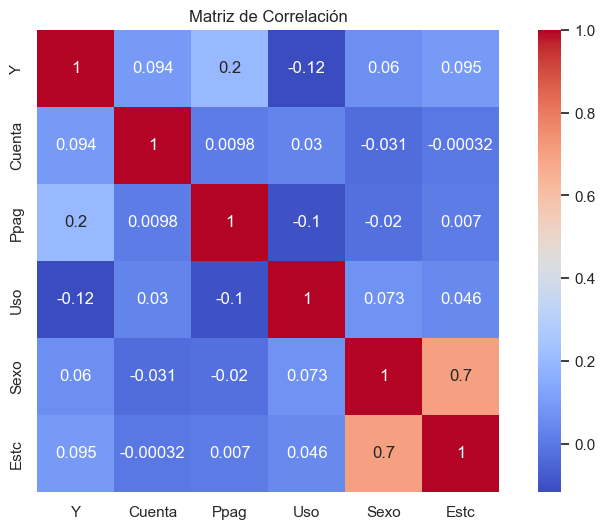

In [25]:
# Cpnvertir las columnas categóricas a numéricas y crear una matriz de correlacion

# Copiar el DataFrame original
df_2_encoded = df_2.copy()

# Definir las columnas categóricas
categorical_columns = ['Y', 'Cuenta', 'Ppag', 'Uso', 'Sexo', 'Estc']

# Convertir las columnas categóricas a numéricas usando label encoding
for col in categorical_columns:
    df_2_encoded[col] = df_2_encoded[col].astype('category').cat.codes

# Crear la matriz de correlación
correlation_matrix = df_2_encoded.corr()

# Visualizar el mapa de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

* **Respuesta**

Según la matriz de corelación Parece que el estado civil del cliente: no vive solo, vive solo y el género está generando un impacto en la asinación de los créditos**

## **Pregunta 3** (7 puntos)

Considerar el conjunto de datos llamado Ozone.csv que contiene datos de contaminación del ozono en la ciudad de Los Ángeles en 1976. Estos datos contienen 366 observaciones sobre 13 variables, siendo cada observación equivalente a un día. Estas variables son las que se muestran en la siguiente tabla:

<div style="text-align: center;">
    <img src="Imagenf.png" alt="Logo personal" style="width:50%;">
</div>

In [27]:
# Cargar el archivo CSV 
df_3 = pd.read_csv("Ozone.csv")

# visualizar las dimensiones del dataset
df_3.shape

(366, 13)

In [28]:
# Visualización de la carga correcta del dataset
df_3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1,4,3.0,5480.0,8,20.0,NaN,NaN,5000.0,-15.0,30.56,200
1,1,2,5,3.0,5660.0,6,NaN,38.0,NaN,NaN,-14.0,NaN,300
2,1,3,6,3.0,5710.0,4,28.0,40.0,NaN,2693.0,-25.0,47.66,250
3,1,4,7,5.0,5700.0,3,37.0,45.0,NaN,590.0,-24.0,55.04,100
4,1,5,1,5.0,5760.0,3,51.0,54.0,45.32,1450.0,25.0,57.02,60


## **a)** (2 punto) Indicar lo siguiente:

* Para cada columna (atributo) indicar la cantidad y el porcentaje de valores perdidos que contiene.
* Realizar un diagrama de barras por cada columna indicando la cantidad de valores perdidos

In [ ]:
# Establecer el año como índice temporalmente
df_indexado = df.set_index('Año')
print(df_indexado.head())

# Seleccionar las primeras 5 filas y las columnas TempSup y TempAire usando iloc
subset = df.iloc[:5, [3, 4]]
print(subset)

# Reiniciar el índice a su forma original
df = df_indexado.reset_index()

**Para cada columna (atributo) indicar la cantidad y el porcentaje de valores perdidos que contiene.**

In [29]:
# Identificando valores nulos y perdidos 

nperdidos = df_3.isnull().sum()

# Ver cuántos valores nulos hay en cada columna

print("Valores perdidos por columna:")
print(nperdidos)

Valores perdidos por columna:
V1       0
V2       0
V3       0
V4       5
V5      12
V6       0
V7      15
V8       2
V9     139
V10     15
V11      1
V12     14
V13      0
dtype: int64


**Interpretación de los Valores Nulos**

**Columnas sin valores nulos:** V1, V2, V3, V6, V13

**Columnas con valores nulos:** V5, V7, V8, V9, V10, V11, V12. 

**V9**  139 tiene la mayor cantidad de valores nulos 

In [30]:
# Porcentaje de valores nulos
porcentaje_perdidos = (nperdidos / len(df_3)) * 100

print("Porcentaje de valores perdidos por columna:")
print(porcentaje_perdidos)

Porcentaje de valores perdidos por columna:
V1      0.000000
V2      0.000000
V3      0.000000
V4      1.366120
V5      3.278689
V6      0.000000
V7      4.098361
V8      0.546448
V9     37.978142
V10     4.098361
V11     0.273224
V12     3.825137
V13     0.000000
dtype: float64


* **Realizar un diagrama de barras por cada columna indicando la cantidad de valores perdidos**

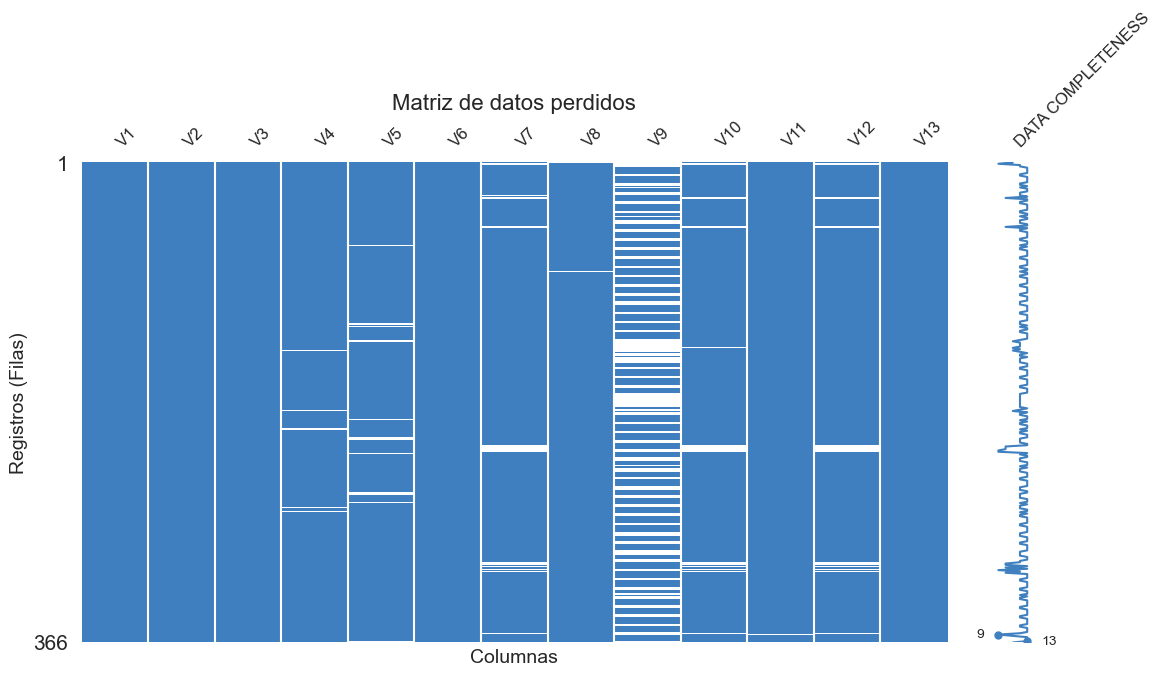

In [31]:
# Personalizar la matriz de valores faltantes
fig = msno.matrix(df_3,  # DataFrame a visualizar
                  fontsize=12,  # Tamaño de la fuente para las etiquetas (default: None)
                  figsize=(12, 6),  # Tamaño de la figura (ancho, alto) en pulgadas
                  color=(0.25, 0.5, 0.75),  # Color personalizado en formato RGB
                  sparkline=True,  # Mostrar la línea lateral que indica la cantidad de datos no nulos por fila
                  labels=True  # Mostrar las etiquetas en el eje X (puedes cambiarlo a False si prefieres ocultarlas)
                 )

# Ajustar título y etiquetas de los ejes para mayor claridad
plt.title("Matriz de datos perdidos", fontsize=16)  # Título de la figura
plt.xlabel("Columnas", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Registros (Filas)", fontsize=14)  # Etiqueta del eje Y

# Ajustar márgenes si es necesario (opcional)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajustar los márgenes alrededor de la figura

# Mostrar la visualización
plt.show()

**c)** (3 puntos) 

Escoger dos variables y justificar si es posible identificar algún mecanismo de valores perdidos entre ellas (MAR, MCAR, MNAR); es decir, indicar si la pérdida de valores en una variable pareciese estar asociada a otra variable. Brindar una justificación gráfica y cuantitativa. 

**Matriz de valores perdidos**

In [ ]:
# Personalizar la matriz de valores faltantes
fig = msno.matrix(df,  # DataFrame a visualizar
                  fontsize=12,  # Tamaño de la fuente para las etiquetas (default: None)
                  figsize=(12, 6),  # Tamaño de la figura (ancho, alto) en pulgadas
                  color=(0.25, 0.5, 0.75),  # Color personalizado en formato RGB
                  sparkline=True,  # Mostrar la línea lateral que indica la cantidad de datos no nulos por fila
                  labels=True  # Mostrar las etiquetas en el eje X (puedes cambiarlo a False si prefieres ocultarlas)
                 )

# Ajustar título y etiquetas de los ejes para mayor claridad
plt.title("Matriz de datos perdidos", fontsize=16)  # Título de la figura
plt.xlabel("Columnas", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Registros (Filas)", fontsize=14)  # Etiqueta del eje Y

# Ajustar márgenes si es necesario (opcional)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Ajustar los márgenes alrededor de la figura

# Mostrar la visualización
plt.show()

# msno.matrix(df) (Esta es la unica linea de código necesaria para visualizar la matriz de datos perdidos

## **Analizando cada columna con valores nulos y perdidos para aplicar técnicas de imputación de datos:**

1. **V5, V8, V10, V11 (Con menos valores perdidos)**

Mecanismo: **MCAR (Perdido Completamente al Azar)**

**Justificación:** La cantidad de datos perdidos es pequeña, y no parece seguir un patrón relacionado con otras variables.

**Técnica a implementar:** Eliminación de filas porque son pocos valores perdidos y no afectará al análisis causando algún impacto relacionado con sesgo o con perdida de información determinante para el modelado posterior.

In [32]:
# Eliminar filas con valores nulos en TempSup
df_3 = df_3.dropna(subset=['V5', 'V8', 'V10', 'V11'])

2. **Columna V9 (139 valores perdidos)**

Mecanismo: **MNAR (Perdido No al Azar)**

**Justificación:** La pérdida de datos podría estar relacionada con las condiciones extremas de humedad, lo que implica un patrón no al azar (por ejemplo, mediciones fallidas en días muy húmedos).

**Técnica Recomendada:** Imputación con la Mediana, porque es más robusta frente a valores extremos o sesgos.

In [33]:
# Imputar Humedad con la mediana
df_3['V9'].fillna(df_3['V9'].median(), inplace=True)

In [34]:
# verificando si quedaron valores nulos
print(df_3.isnull().sum())

V1     0
V2     0
V3     0
V4     5
V5     0
V6     0
V7     1
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
dtype: int64


In [35]:
# Eliminar filas con valores nulos en TempSup
df_3 = df_3.dropna(subset=['V4', 'V7'])

In [36]:
# verificando si quedaron valores nulos
print(df_3.isnull().sum())# verificando si quedaron valores nulos

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
dtype: int64


**Como se evidencia ya no hay valores nulos - perdidos**